### Δεδομένα

Data Link: https://www.cryptodatadownload.com/data/binance/ 

Τα δεδομένα που χρησιμοποιούμε είναι από την πλατφόρμα της binance.

### Λίγες πληρφορίες για αυτά:

Περιέχουν τις πληροφορίες του bitcoin ανά λεπτό.


Επίσης η πληροφορία που μας ενδιαφέρει είναι το close του BTC. Το close είναι η τιμή που διαμορφόθηκε εκείνη τη στιγμή στο bitcoin. Το volume είναι η ποσότητα που αγοράστηκε/πουλήθηκε εκείνη τι στιγμή. 

'Αρα στην ουσία το close είναι η τιμή ενός BTC που συναλλάχθηκε εκέίνη τη στιγμή και το volume είναι η ποσότητα που συναλλάχθηκε.

Το open είναι η τιμή που άνοιξε στο bitcoin, το low είναι η χαμηλότερη τιμή πώλησης του ανοίγματος και το high η ηψυλότερη τιμή

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.preprocessing import MinMaxScaler
import random
import time
import copy
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import tensorflow as tf
%matplotlib inline

## Import data

In [2]:
btc_input_df  = pd.read_csv("BTC-USD.csv", parse_dates=["time"], nrows=14400)
btc_input_df.head()

,time,low,high,open,close,volume
0,2021-10-30 03:00:00,61868.81,61920.00,61888.18,61919.98,2.946079
1,2021-10-30 02:59:00,61882.74,61912.67,61903.16,61882.74,2.942357
2,2021-10-30 02:58:00,61854.82,61907.96,61854.82,61903.15,3.047848
3,2021-10-30 02:57:00,61848.04,61883.02,61883.01,61851.39,3.381070
4,2021-10-30 02:56:00,61879.33,61925.42,61907.47,61882.28,5.663128


In [3]:
btc_input_df = btc_input_df.set_index('time')
btc_input_df.head()

,low,high,open,close,volume
time,,,,,
2021-10-30 03:00:00,61868.81,61920.00,61888.18,61919.98,2.946079
2021-10-30 02:59:00,61882.74,61912.67,61903.16,61882.74,2.942357
2021-10-30 02:58:00,61854.82,61907.96,61854.82,61903.15,3.047848
2021-10-30 02:57:00,61848.04,61883.02,61883.01,61851.39,3.381070
2021-10-30 02:56:00,61879.33,61925.42,61907.47,61882.28,5.663128


In [4]:
btc_input_df = btc_input_df.sort_index()
btc_input_df.head()

,low,high,open,close,volume
time,,,,,
2021-10-20 03:01:00,63816.52,63860.23,63839.44,63823.36,2.736049
2021-10-20 03:02:00,63812.47,63835.33,63823.36,63827.88,3.145124
2021-10-20 03:03:00,63810.00,63837.24,63827.56,63810.01,6.178755
2021-10-20 03:04:00,63792.27,63823.50,63810.00,63817.06,4.367886
2021-10-20 03:05:00,63806.39,63849.85,63813.21,63847.04,6.441521


In [5]:
print(btc_input_df.shape)
print("------------------------")
print(btc_input_df.info())

(14400, 5)
------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14400 entries, 2021-10-20 03:01:00 to 2021-10-30 03:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   low     14400 non-null  float64
 1   high    14400 non-null  float64
 2   open    14400 non-null  float64
 3   close   14400 non-null  float64
 4   volume  14400 non-null  float64
dtypes: float64(5)
memory usage: 675.0 KB
None


In [6]:
btc_input_df.head()

,low,high,open,close,volume
time,,,,,
2021-10-20 03:01:00,63816.52,63860.23,63839.44,63823.36,2.736049
2021-10-20 03:02:00,63812.47,63835.33,63823.36,63827.88,3.145124
2021-10-20 03:03:00,63810.00,63837.24,63827.56,63810.01,6.178755
2021-10-20 03:04:00,63792.27,63823.50,63810.00,63817.06,4.367886
2021-10-20 03:05:00,63806.39,63849.85,63813.21,63847.04,6.441521


In [7]:
btc_input_df.tail()

,low,high,open,close,volume
time,,,,,
2021-10-30 02:56:00,61879.33,61925.42,61907.47,61882.28,5.663128
2021-10-30 02:57:00,61848.04,61883.02,61883.01,61851.39,3.381070
2021-10-30 02:58:00,61854.82,61907.96,61854.82,61903.15,3.047848
2021-10-30 02:59:00,61882.74,61912.67,61903.16,61882.74,2.942357
2021-10-30 03:00:00,61868.81,61920.00,61888.18,61919.98,2.946079


## Plot informations

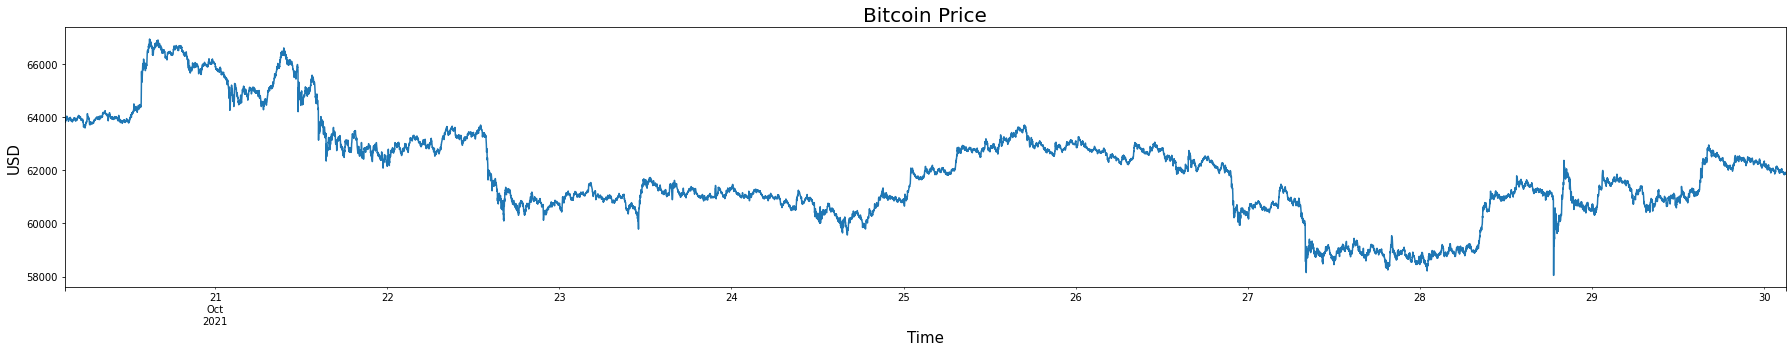

In [8]:
plt.figure(figsize=(20,5))
plt.title("Bitcoin Price", fontsize=20)
btc_input_df.close.plot(figsize=(25,5))
plt.xlabel("Time", fontsize=15)
plt.ylabel("USD", fontsize=15)
plt.tight_layout()

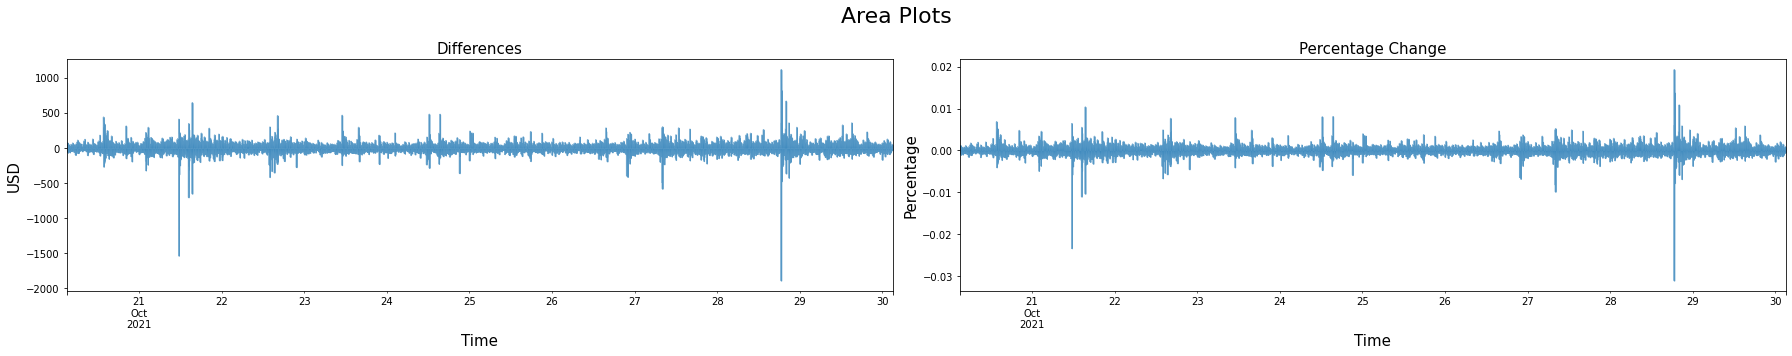

In [9]:
plt.figure(figsize=(25,5))
plt.suptitle('Area Plots', fontsize=22)

plt.subplot(1,2,1)
btc_input_df.close.diff().plot.area(stacked=False,)
plt.ylabel("USD", fontsize="15")
plt.xlabel("Time", fontsize="15")
plt.title("Differences", fontsize="15")

plt.subplot(1,2,2)
btc_input_df.close.pct_change().plot.area(stacked=False,)
plt.ylabel("Percentage", fontsize="15")
plt.xlabel("Time", fontsize="15")
plt.title("Percentage Change", fontsize="15")

plt.tight_layout()

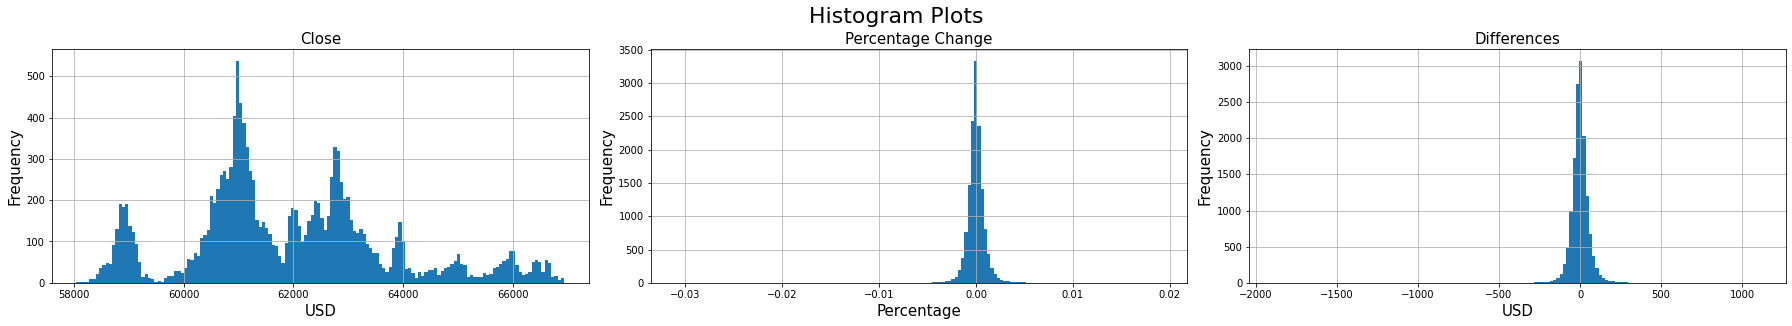

In [10]:
plt.figure(figsize=(25,12))
plt.suptitle('Histogram Plots', fontsize=22)

plt.subplot(3,3,1)
btc_input_df.close.hist(bins=150)
plt.xlabel("USD", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title('Close', fontsize=15)

plt.subplot(3,3,2)
btc_input_df.close.pct_change().hist(bins=150)
plt.xlabel("Percentage", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title('Percentage Change', fontsize=15)

plt.subplot(3,3,3)
btc_input_df.close.diff().hist(bins=150)
plt.xlabel("USD", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title('Differences', fontsize=15)

plt.tight_layout()

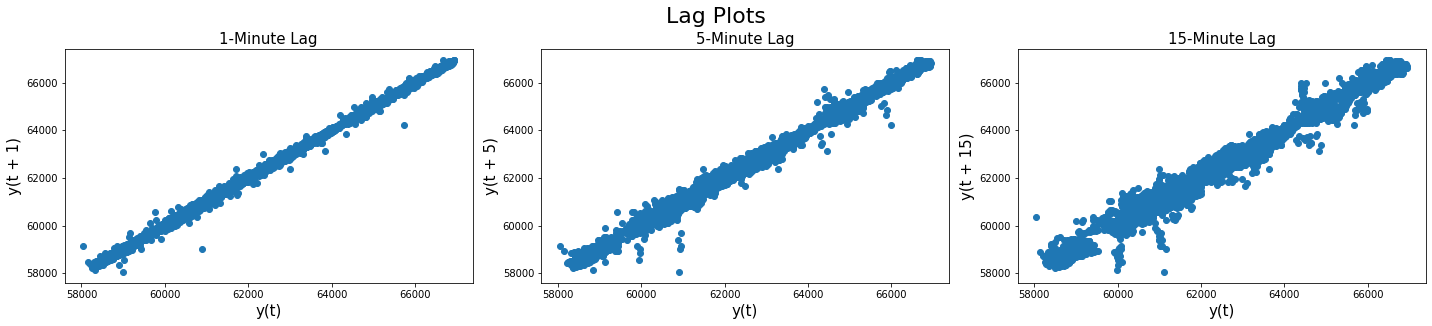

In [11]:
# κάνουμε plot το corelation 
plt.figure(figsize=(20,12))
plt.suptitle('Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(btc_input_df['close'], lag=1) #minute lag
plt.xlabel("y(t)", fontsize=15)
plt.ylabel("y(t + 1)", fontsize=15)
plt.title('1-Minute Lag', fontsize=15)

plt.subplot(3,3,2)
pd.plotting.lag_plot(btc_input_df['close'], lag=5) 
plt.xlabel("y(t)", fontsize=15)
plt.ylabel("y(t + 5)", fontsize=15)
plt.title('5-Minute Lag', fontsize=15)

plt.subplot(3,3,3)
pd.plotting.lag_plot(btc_input_df['close'], lag=15) 
plt.xlabel("y(t)", fontsize=15)
plt.ylabel("y(t + 15)", fontsize=15)
plt.title('15-Minute Lag', fontsize=15)

plt.tight_layout()

## Pre processing data for LSTM model

In [12]:
btc_closing_price = btc_input_df['close'].copy()
btc_closing_price.head()

time
2021-10-20 03:01:00    63823.36
2021-10-20 03:02:00    63827.88
2021-10-20 03:03:00    63810.01
2021-10-20 03:04:00    63817.06
2021-10-20 03:05:00    63847.04
Name: close, dtype: float64

In [13]:
df_train= btc_closing_price[:-2000].copy()
df_test= btc_closing_price[-2000:].copy()

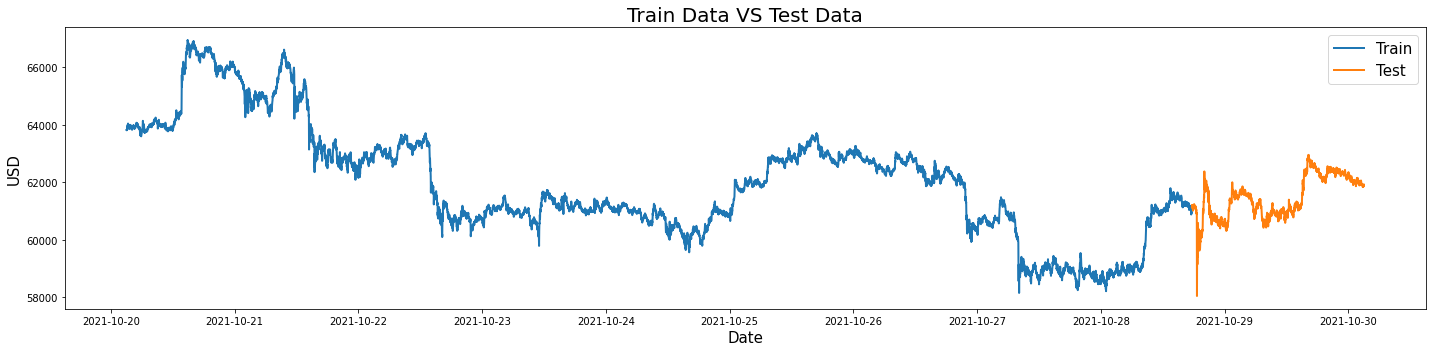

In [14]:
plt.figure(figsize=(20,5))
plt.plot(df_train, label='Train', linewidth=2, )
plt.plot(df_test, label='Test', linewidth=2)
plt.xlabel("Date", fontsize=15)
plt.ylabel('USD', fontsize=15)
plt.title('Train Data VS Test Data', fontsize=20)
plt.legend(loc='best', fontsize=15)
plt.tight_layout()

In [15]:
df_train= df_train.values.reshape(df_train.shape[0],1)
df_test= df_test.values.reshape(df_test.shape[0],1)

In [16]:
df_train.shape

(12400, 1)

In [17]:
scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test)

In [18]:
def dataset_generator_lstm(dataset, look_back=10):
    dataX, dataY = [], []
    
    for i in range(len(dataset) - look_back):   
        window_size_x = dataset[i:(i + look_back)]
        dataX.append(window_size_x)
        dataY.append(dataset[i + look_back])
        
    return np.array(dataX), np.array(dataY)

trainX, trainY = dataset_generator_lstm(scaled_train)
testX, testY = dataset_generator_lstm(scaled_test)

print("trainX: ", trainX.shape)
print("trainY: ", trainY.shape)
print("testΧ: ", testX.shape)
print("testY", testY.shape)

trainX:  (12390, 10, 1)
trainY:  (12390, 1)
testΧ:  (1990, 10, 1)
testY (1990, 1)


Για το LSTM πρέπει να αναδιαμορφώσoyme την είσοδο ώστε να είναι ένας τρισδιάστατος πίνακας 
[δείγματα , χρονικά βήματα, χαρακτηριστικά]
Δείγματα (Samples): Είναι το len(trainX) , δηλαδή η ποσότητα των data points που έχουμε
Χαρακτηριστικά (Features): Η ποσότητα των χαρακτηριστικών σε κάθε timestep. Στην συγκεκριμένη περίπτωση το χαρακτηριστικό που έχουμε είναι η τιμή του bitcoin.  

In [19]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1 ))

print("Shape of trainX: ", trainX.shape)
print("Shape of testX: ", testX.shape)

Shape of trainX:  (12390, 10, 1)
Shape of testX:  (1990, 10, 1)


## Create LSTM model

In [20]:
model = Sequential()

model.add(LSTM(units=32, activation ='tanh', return_sequences=False, input_shape = (trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))

# model.add(LSTM(units = 64, activation = 'tanh', return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 32, activation = 'tanh', return_sequences=False, input_shape = (trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 64, activation = 'tanh', return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 64, activation = 'tanh',return_sequences=False,input_shape = (trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
checkpoint_path = f'./models/btc_model_{int(time.time())}.hdf5'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
callbacks = [checkpoint, earlystopping]
history = model.fit(trainX, trainY, batch_size = 64, epochs = 100, 
                    verbose=1, shuffle=False, 
                    validation_split=0.2, callbacks=callbacks)

Epoch 1/100
153/155 [============================>.] - ETA: 0s - loss: 0.0506- ETA: 0s - lo
Epoch 00001: val_loss improved from inf to 0.01381, saving model to ./models\btc_model_1648495525.hdf5
155/155 [==============================] - 7s 20ms/step - loss: 0.0501 - val_loss: 0.0138
Epoch 2/100
152/155 [============================>.] - ETA: 0s - loss: 0.0068
Epoch 00002: val_loss improved from 0.01381 to 0.00890, saving model to ./models\btc_model_1648495525.hdf5
155/155 [==============================] - 2s 13ms/step - loss: 0.0067 - val_loss: 0.0089
Epoch 3/100
152/155 [============================>.] - ETA: 0s - loss: 0.0056
Epoch 00003: val_loss improved from 0.00890 to 0.00680, saving model to ./models\btc_model_1648495525.hdf5
155/155 [==============================] - 2s 14ms/step - loss: 0.0056 - val_loss: 0.0068
Epoch 4/100
154/155 [============================>.] - ETA: 0s - loss: 0.0045- E
Epoch 00004: val_loss improved from 0.00680 to 0.00548, saving model to ./models\btc

In [22]:
model_from_saved_checkpoint = load_model(checkpoint_path)

## How good is our model?

Text(0.5, 1.0, 'Model Performance')

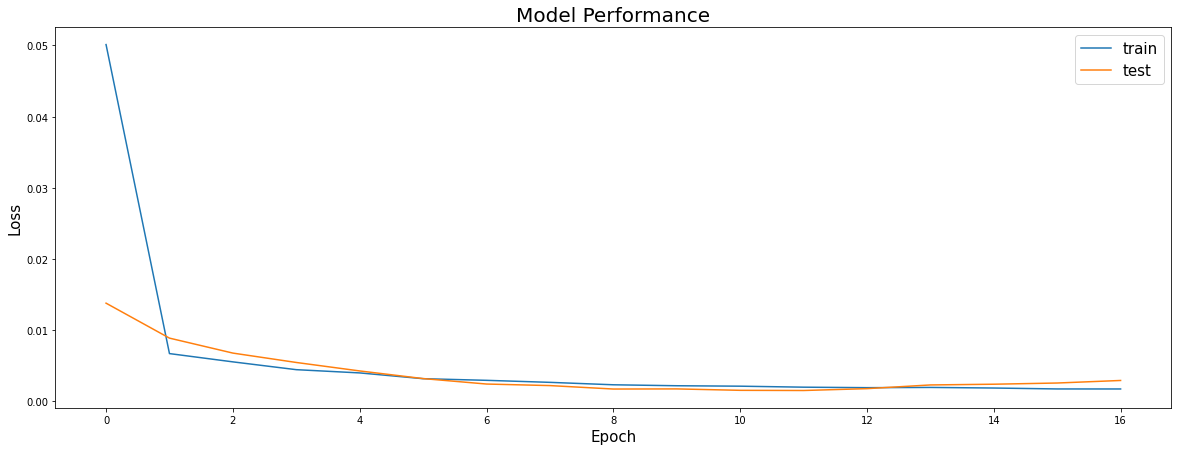

In [23]:
plt.figure(figsize=(20,7))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend(loc='best', fontsize=15)
plt.xlabel("Epoch",fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.title("Model Performance", fontsize=20)

In [24]:
# Τα μετατρέπουμε στην κανονική τους μορφή και κάνουμε τις προβλέψεις
predicted_btc_price_test_data = model_from_saved_checkpoint.predict(testX)
predicted_btc_price_test_data = scaler_test.inverse_transform(predicted_btc_price_test_data.reshape(testX.shape[0], 1))
test_actual = scaler_test.inverse_transform(testY.reshape(testX.shape[0], 1))

def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))

print(f"Mean Absolute Error: {mean_absolute_error(predicted_btc_price_test_data, test_actual)}")
print(f"Mean Square Error: {mean_squared_error(predicted_btc_price_test_data, test_actual)}")
print(f"r2 score: {r2_score(predicted_btc_price_test_data, test_actual)}")
print(f"Root Mean Square Error: {rmse(predicted_btc_price_test_data, test_actual)}")

Mean Absolute Error: 214.25324772298993
Mean Square Error: 65529.0722755182
r2 score: 0.8266256639150087
Root Mean Square Error: 255.98646893052413


In [25]:
# Τα μετατρέπουμε στην κανονική τους μορφή και κάνουμε τις προβλέψεις
predicted_btc_price_train_data = model_from_saved_checkpoint.predict(trainX)
predicted_btc_price_train_data = scaler_train.inverse_transform(predicted_btc_price_train_data.reshape(trainX.shape[0], 1))
train_actual = scaler_train.inverse_transform(trainY.reshape(trainY.shape[0], 1))

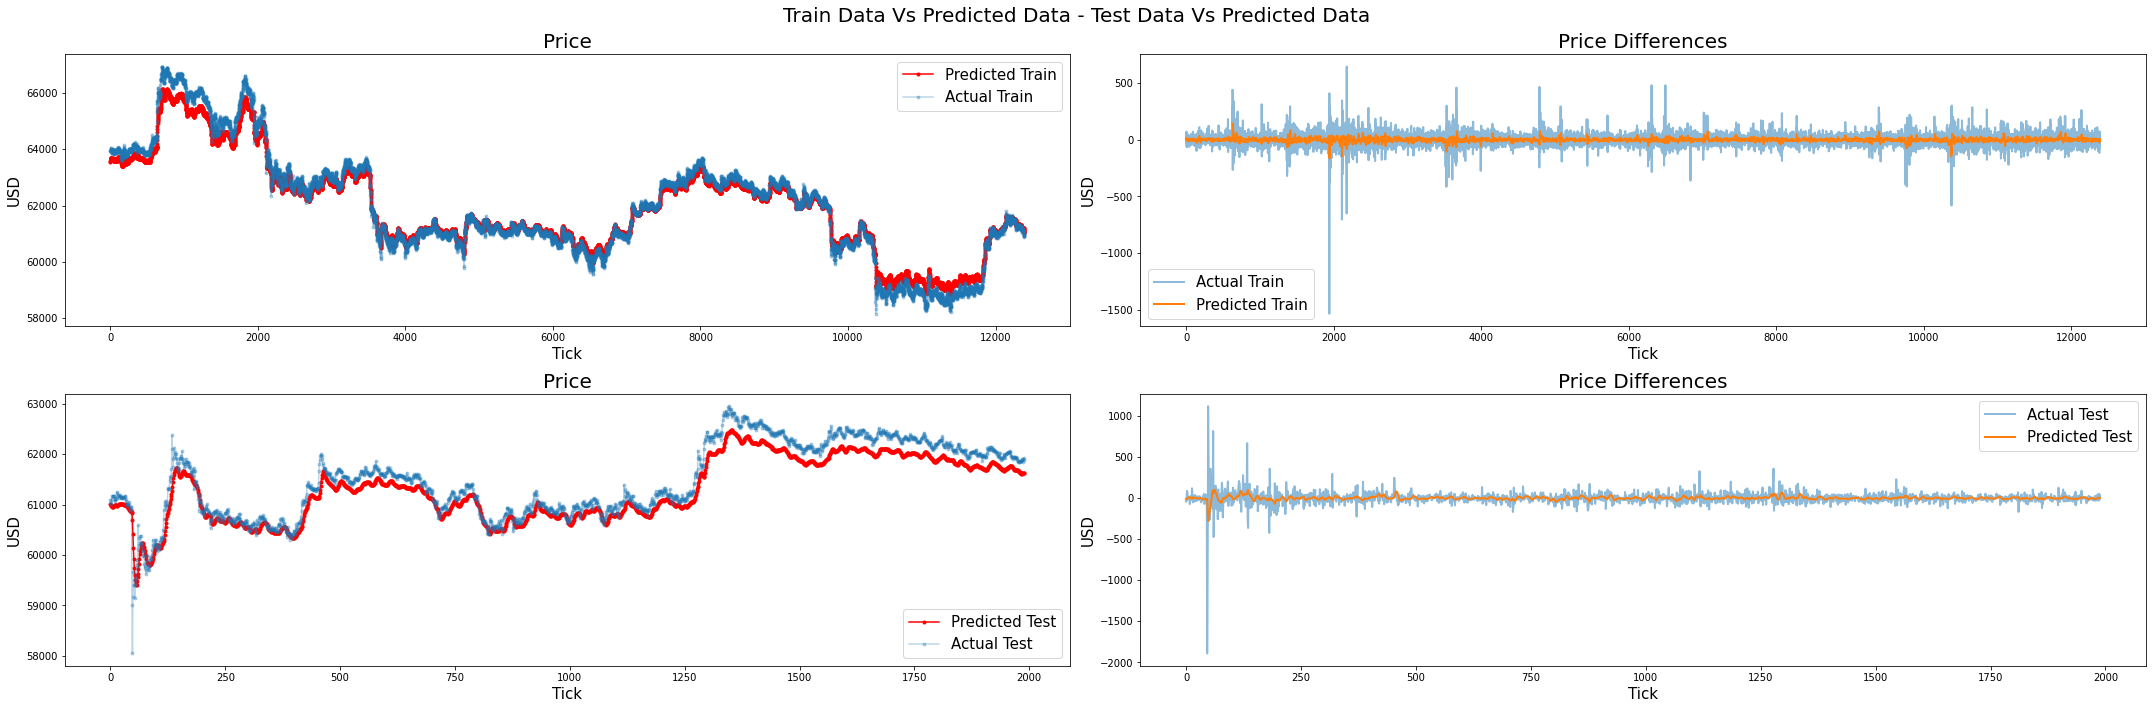

In [26]:
plt.figure(figsize=(30,10))
plt.suptitle("Train Data Vs Predicted Data - Test Data Vs Predicted Data", fontsize=20)

plt.subplot(2,2,1)
plt.plot(predicted_btc_price_train_data, 'r', marker='.', label='Predicted Train')
plt.plot(train_actual, marker='.', label='Actual Train', alpha=0.3)
plt.xlabel("Tick", fontsize=15)
plt.ylabel("USD", fontsize=15)
plt.title("Price", fontsize=20)
plt.legend(loc='best', fontsize='15')

plt.subplot(2,2,2)
plt.plot(np.diff(train_actual, axis=0),label='Actual Train', alpha=0.5, linewidth=2)
plt.plot(np.diff(predicted_btc_price_train_data, axis=0), label='Predicted Train', linewidth=2)
plt.xlabel("Tick", fontsize=15)
plt.ylabel("USD", fontsize=15)
plt.title("Price Differences", fontsize=20)
plt.legend(loc='best', fontsize='15')
plt.tight_layout()

plt.subplot(2,2,3)
plt.plot(predicted_btc_price_test_data, 'r', marker='.', label='Predicted Test')
plt.plot(test_actual, marker='.', label='Actual Test', alpha=0.3)
plt.xlabel("Tick", fontsize=15)
plt.ylabel("USD", fontsize=15)
plt.title("Price", fontsize=20)
plt.legend(loc='best', fontsize='15')

plt.subplot(2,2,4)
plt.plot(np.diff(test_actual, axis=0),label='Actual Test', alpha=0.5, linewidth=2)
plt.plot(np.diff(predicted_btc_price_test_data, axis=0), label='Predicted Test', linewidth=2)
plt.xlabel("Tick", fontsize=15)
plt.ylabel("USD", fontsize=15)
plt.title("Price Differences", fontsize=20)
plt.legend(loc='best', fontsize='15')
plt.tight_layout()

## Forecasting

In [27]:
lookback_period = 360 # 6 hours
testX_last_days = testX[testX.shape[0] - lookback_period:]
print(testX_last_days.shape)
predicted_days_forecast_price_test_x = []

for i in range(lookback_period):  
    predicted_forecast_price_test_x = model_from_saved_checkpoint.predict(testX_last_days[i:i+1])
    predicted_forecast_price_test_x = scaler_test.inverse_transform(predicted_forecast_price_test_x.reshape(-1, 1))
    predicted_days_forecast_price_test_x.append(predicted_forecast_price_test_x)

predicted_days_forecast_price_test_x = np.array(predicted_days_forecast_price_test_x)
predicted_days_forecast_price_test_x = predicted_days_forecast_price_test_x.flatten()

predicted_btc_price_test_data = predicted_btc_price_test_data.flatten()
predicted_btc_test_concatenated = np.concatenate((predicted_btc_price_test_data, predicted_days_forecast_price_test_x))

(360, 10, 1)


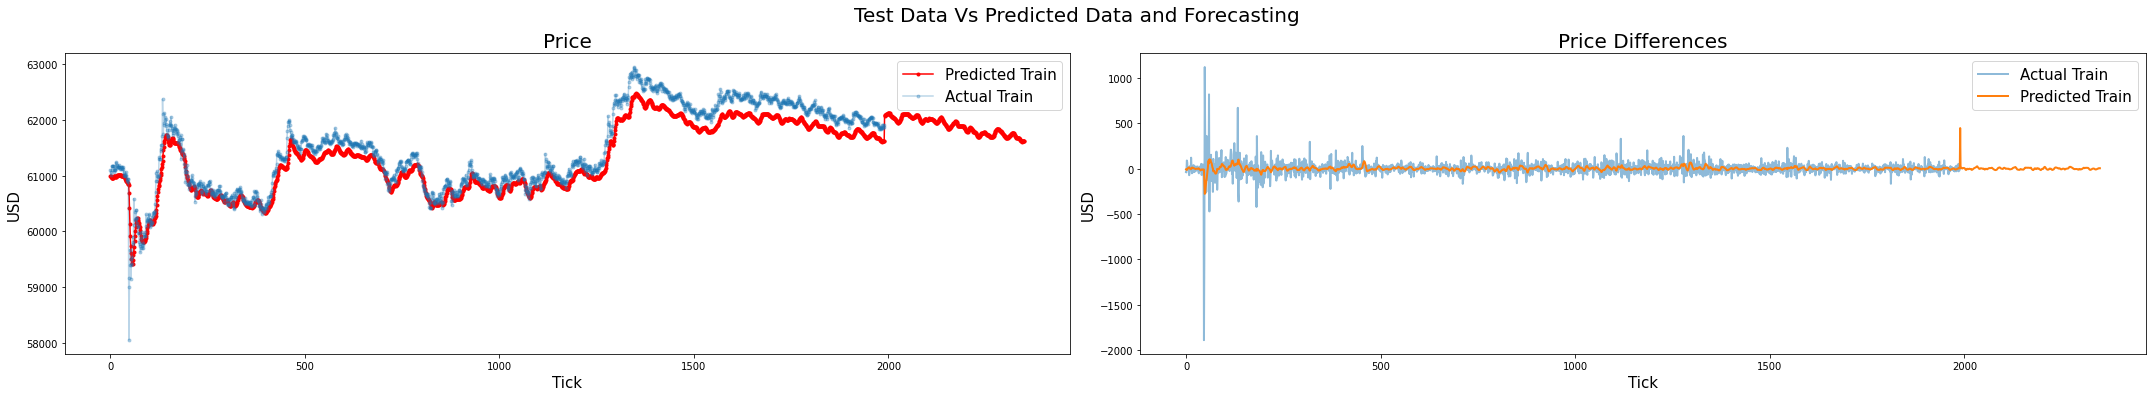

In [28]:
plt.figure(figsize=(30,10))
plt.suptitle("Test Data Vs Predicted Data and Forecasting", fontsize=20)

plt.subplot(2,2,1)
plt.plot(predicted_btc_test_concatenated, 'r', marker='.', label='Predicted Train')
plt.plot(test_actual, marker='.', label='Actual Train', alpha=0.3)
plt.xlabel("Tick", fontsize=15)
plt.ylabel("USD", fontsize=15)
plt.title("Price", fontsize=20)
plt.legend(loc='best', fontsize='15')

plt.subplot(2,2,2)
plt.plot(np.diff(test_actual, axis=0),label='Actual Train', alpha=0.5, linewidth=2)
plt.plot(np.diff(predicted_btc_test_concatenated, axis=0), label='Predicted Train', linewidth=2)
plt.xlabel("Tick", fontsize=15)
plt.ylabel("USD", fontsize=15)
plt.title("Price Differences", fontsize=20)
plt.legend(loc='best', fontsize='15')
plt.tight_layout()

## Create dataframe for our trade positions

In [29]:
df_strategy_actual = pd.DataFrame(test_actual)
df_strategy_predicted = pd.DataFrame(predicted_btc_price_test_data)

df_strategy_actual = df_strategy_actual.rename(columns={0: "close"})
df_strategy_predicted = df_strategy_predicted.rename(columns={0: "close"})

In [30]:
def classify(current, future):
    if future is None:
        return
    """
    Επιστρέφει 1 αν η τιμή στο μέλλον είναι αυξημένη ή
    -1 αν η τιμή στο μέλλον είναι μειωμένη
    """
    if float(future) > float(current):
        return 1
    elif float(future) < float(current):
        return -1

In [31]:
df_strategy_actual['future'] = df_strategy_actual["close"].shift(-1)
df_strategy_predicted['future'] = df_strategy_predicted["close"].shift(-1)
df_strategy_actual['target'] = list(map(classify, df_strategy_actual["close"], df_strategy_actual["future"]))
df_strategy_predicted['target'] = list(map(classify, df_strategy_predicted["close"], df_strategy_predicted["future"]))

frames = [df_strategy_actual, df_strategy_predicted]
result = pd.concat(frames, axis=1, ignore_index=True)
result = result.rename(columns={0: "actual_close", 
                                1:"actual_future_close", 
                                2:"actual_target",
                                3:"predicted_close",
                                4:"predicted_future_close",
                                5:"predicted_target"})
result.dropna(inplace = True)
result["prcnt_change"] = (result['predicted_future_close'] - result['predicted_close'] ) / result['predicted_close']
result.reset_index(inplace=True, drop=True)
result.head(10)

,actual_close,actual_future_close,actual_target,predicted_close,predicted_future_close,predicted_target,prcnt_change
0,61097.72,61058.19,-1.0,61002.449219,60992.679688,-1.0,-0.000160
1,61058.19,61015.05,-1.0,60992.679688,60980.156250,-1.0,-0.000205
2,61015.05,61103.50,1.0,60980.156250,60963.406250,-1.0,-0.000275
3,61103.50,61173.48,1.0,60963.406250,60952.718750,-1.0,-0.000175
4,61173.48,61166.25,-1.0,60952.718750,60951.179688,-1.0,-0.000025
5,61166.25,61178.13,1.0,60951.179688,60955.406250,1.0,0.000069
6,61178.13,61168.92,-1.0,60955.406250,60964.882812,1.0,0.000155
7,61168.92,61176.30,1.0,60964.882812,60976.210938,1.0,0.000186
8,61176.30,61102.84,-1.0,60976.210938,60988.210938,1.0,0.000197
9,61102.84,61071.34,-1.0,60988.210938,60993.464844,1.0,0.000086


## RRL Stock Trading

In [32]:
def sharpe_ratio(rets):
    return rets.mean() / rets.std()

def positions(x, theta):
    M = len(theta) - 2
    T = len(x)
    Ft = np.zeros(T)
    for t in range(M, T):
        xt = np.concatenate([[1], x[t - M:t], [Ft[t - 1]]])
        Ft[t] = np.tanh(np.dot(theta, xt))
    return Ft

def returns(Ft, x, delta=0):
    T = len(x)
    rets = Ft[0:T - 1] * x[1:T] - delta * np.abs(Ft[1:T] - Ft[0:T - 1])
    return np.concatenate([[0], rets])

def gradient(x, theta, delta):
    Ft = positions(x, theta)
    R = returns(Ft, x, delta)
    T = len(x)
    M = len(theta) - 2
    
    A = np.mean(R)
    B = np.mean(np.square(R))
    S = A / np.sqrt(B - A ** 2)

    dSdA = S * (1 + S ** 2) / A
    dSdB = -S ** 3 / 2 / A ** 2
    dAdR = 1. / T
    dBdR = 2. / T * R
    
    grad = np.zeros(M + 2)  
    dFpdtheta = np.zeros(M + 2)  
    
    for t in range(M, T):
        xt = np.concatenate([[1], x[t - M:t], [Ft[t-1]]])
        dRdF = -delta * np.sign(Ft[t] - Ft[t-1])
        dRdFp = x[t] + delta * np.sign(Ft[t] - Ft[t-1])
        dFdtheta = (1 - Ft[t] ** 2) * (xt + theta[-1] * dFpdtheta)
        dSdtheta = (dSdA * dAdR + dSdB * dBdR[t]) * (dRdF * dFdtheta + dRdFp * dFpdtheta)
        grad = grad + dSdtheta
        dFpdtheta = dFdtheta
        
    return grad, S

def train(x, epochs=2000, M=8, commission=0, learning_rate = 0.3):
    theta = np.random.rand(M + 2)
    sharpes = np.zeros(epochs) 
    for i in range(epochs):
        grad, sharpe = gradient(x, theta, commission)
        theta = theta + grad * learning_rate
        sharpes[i] = sharpe
    
    print("finished training")
    return theta, sharpes

In [33]:
rets = btc_input_df['close'].copy().diff()[1:14400]
x = np.array(rets)
N = 12400 
P = 1440
x_train = x[:N]
x_test = x[-P:]

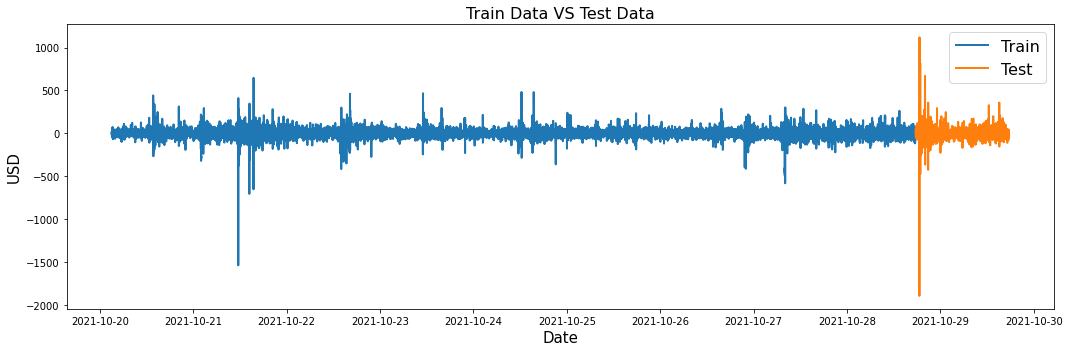

In [34]:
plt.figure(figsize=(15,5))
plt.plot(rets[:N], label='Train', linewidth=2,)
plt.plot(rets[N:N+P], label='Test', linewidth=2,)
plt.ylabel('USD', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.title('Train Data VS Test Data', fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.tight_layout()

In [35]:
# standardizing the values
std = np.std(x_train)
mean = np.mean(x_train)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# for lstm predictions
x_lstm_test = np.diff(predicted_btc_price_test_data[:1441])
x_lstm_test = (x_lstm_test - mean) / std

In [36]:
%%time
np.random.seed(0)
print('start training')
theta, sharpes = train(x_train, epochs=1000, M=10, commission=0, learning_rate=0.5)

start training
finished training
CPU times: total: 12min 30s
Wall time: 12min 41s


Sharpe ratio: 0.05408894073999378


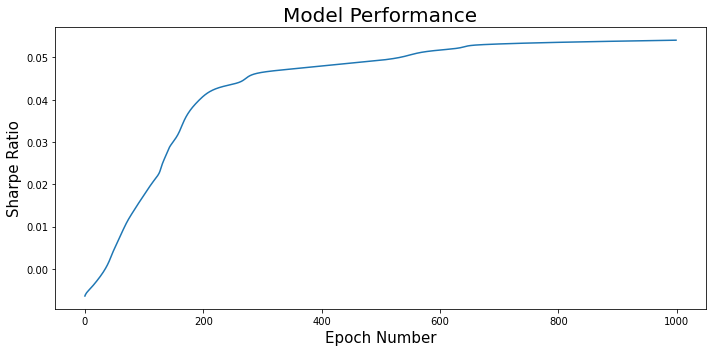

In [37]:
plt.figure(figsize=(10,5))
plt.title("Model Performance", fontsize=20)
plt.plot(sharpes)
plt.xlabel('Epoch Number', fontsize=15)
plt.ylabel('Sharpe Ratio', fontsize=15)
plt.tight_layout()
print(f"Sharpe ratio: {sharpes[-1]}")

In [38]:
train_returns = returns(positions(x_train, theta), x_train)
test_returns = returns(positions(x_test, theta), x_test)

train_positions = positions(x_train, theta)
test_positions = positions(x_test, theta)

lstm_returns= returns(positions(x_lstm_test, theta), x_test)
lstm_positions = positions(x_lstm_test, theta)

RL model on train data: 585.0541623379128 USD
Buy and Hold - train Data: -3.148592497836944e-13 USD
RL model on test data: 62.10885514535365 USD
RL model on lstm predictions: -35.60316312866123 USD
Buy and Hold - test data: 10.32768745933278 USD


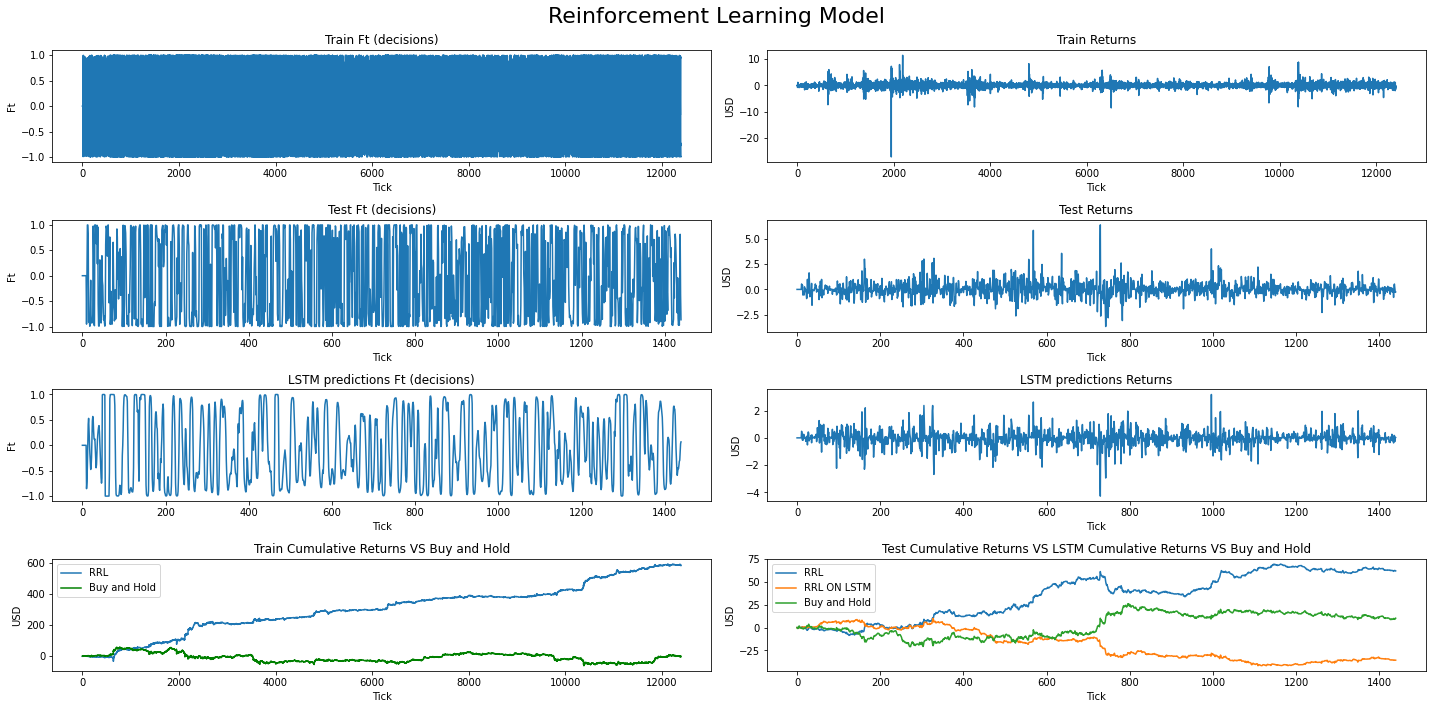

In [39]:
plt.figure(figsize=(20,10))
plt.suptitle('Reinforcement Learning Model', fontsize=22)

plt.subplot(4,2,1)
plt.xlabel("Tick")
plt.ylabel("Ft")
plt.plot(train_positions)
plt.title("Train Ft (decisions)")

plt.subplot(4,2,2)
plt.xlabel("Tick")
plt.ylabel('USD')
plt.plot(train_returns)
plt.title("Train Returns")

plt.subplot(4,2,3)
plt.xlabel("Tick")
plt.ylabel("Ft")
plt.plot(test_positions)
plt.title("Test Ft (decisions)")

plt.subplot(4,2,4)
plt.xlabel("Tick")
plt.ylabel('USD')
plt.plot(test_returns)
plt.title("Test Returns")

plt.subplot(4,2,5)
plt.xlabel("Tick")
plt.ylabel('Ft')
plt.plot(lstm_positions)
plt.title("LSTM predictions Ft (decisions)")

plt.subplot(4,2,6)
plt.xlabel("Tick")
plt.ylabel('USD')
plt.plot(lstm_returns)
plt.title("LSTM predictions Returns")

plt.subplot(4,2,7)
plt.xlabel("Tick")
plt.ylabel('USD')
plt.plot(train_returns.cumsum(), label="RRL")

plt.subplot(4,2,7)
plt.xlabel("Tick")
plt.ylabel('USD')
plt.plot(x_train.cumsum(), color="green", label="Buy and Hold")
plt.title("Train Cumulative Returns VS Buy and Hold")
plt.legend()

plt.subplot(4,2,8)
plt.xlabel("Tick")
plt.ylabel('USD')
plt.plot(test_returns.cumsum(), label= "RRL")

plt.subplot(4,2,8)
plt.xlabel("Tick")
plt.plot(lstm_returns.cumsum(), label= "RRL ON LSTM")

plt.subplot(4,2,8)
plt.xlabel("Tick")
plt.plot(x_test.cumsum(), label= "Buy and Hold")
plt.title("Test Cumulative Returns VS LSTM Cumulative Returns VS Buy and Hold")
plt.legend(loc='best')

plt.tight_layout()

print(f"RL model on train data: {train_returns.cumsum()[-1]} USD" )
print(f"Buy and Hold - train Data: {x_train.cumsum()[-1]} USD")
print(f"RL model on test data: {test_returns.cumsum()[-1]} USD")
print(f"RL model on lstm predictions: {lstm_returns.cumsum()[-1]} USD")
print(f"Buy and Hold - test data: {x_test.cumsum()[-1]} USD")

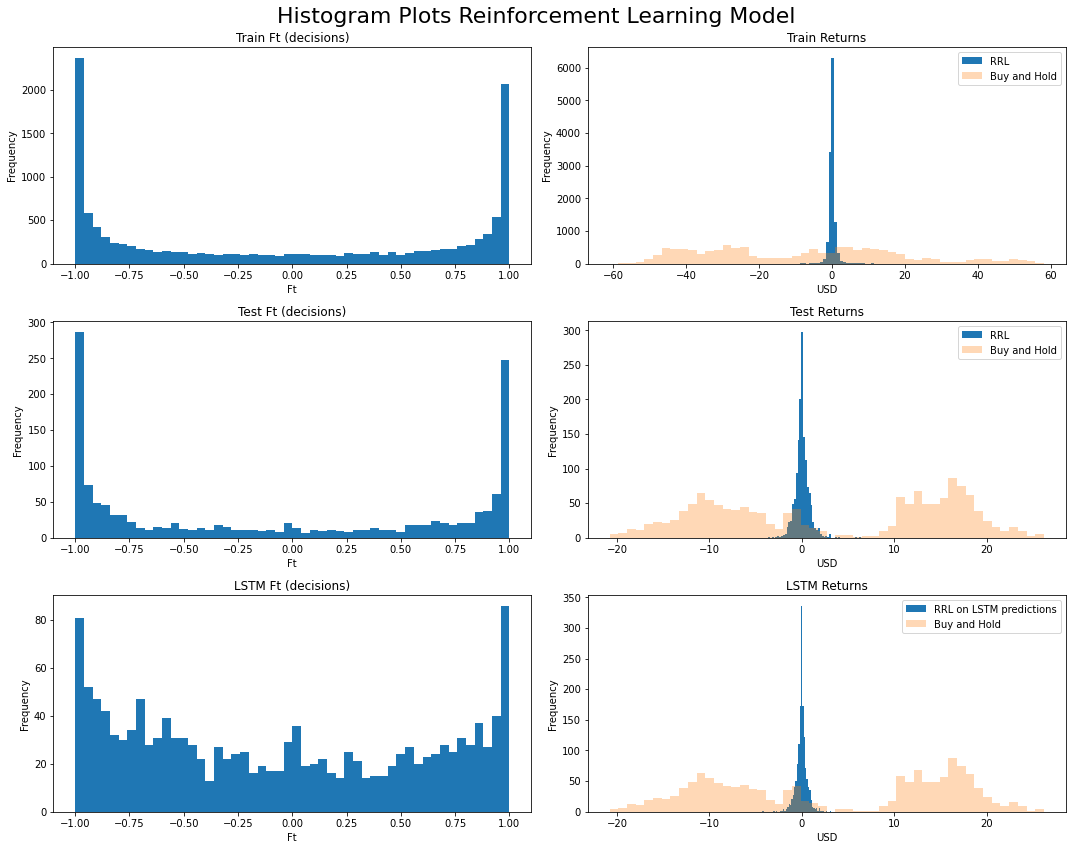

In [40]:
plt.figure(figsize=(15,12))
HIST_BINS = 50
plt.suptitle('Histogram Plots Reinforcement Learning Model', fontsize=22)

plt.subplot(3,2,1)
plt.ylabel("Frequency", )
plt.xlabel("Ft")
plt.hist(train_positions, bins=HIST_BINS)
plt.title("Train Ft (decisions)")

plt.subplot(3,2,2)
plt.ylabel("Frequency", )
plt.xlabel("USD")
plt.hist(train_returns, bins=HIST_BINS, label="RRL")
plt.hist(x_train.cumsum(), bins=HIST_BINS, alpha=0.3, label="Buy and Hold")
plt.title("Train Returns")
plt.legend()

plt.subplot(3,2,3)
plt.xlabel("Ft")
plt.ylabel("Frequency", )
plt.hist(test_positions, bins=HIST_BINS)
plt.title("Test Ft (decisions)")

plt.subplot(3,2,4)
plt.xlabel("USD")
plt.ylabel("Frequency",)
plt.hist(test_returns, bins=HIST_BINS, label="RRL")
plt.hist(x_test.cumsum(), bins=HIST_BINS, alpha=0.3, label="Buy and Hold")
plt.title("Test Returns")
plt.legend()

plt.subplot(3,2,5)
plt.xlabel("Ft")
plt.ylabel("Frequency",)
plt.hist(lstm_positions, bins=HIST_BINS)
plt.title("LSTM Ft (decisions)")

plt.subplot(3,2,6)
plt.ylabel("Frequency", )
plt.xlabel("USD")
plt.hist(lstm_returns, bins=HIST_BINS, label="RRL on LSTM predictions")
plt.hist(x_test.cumsum(), bins=HIST_BINS, alpha=0.3, label="Buy and Hold")
plt.title("LSTM Returns")
plt.legend()

plt.tight_layout()

## Functions for Trading

In [41]:
def trade_long(positions, stock_prices, usd=5000, btc=0, fee=0):
    """
    Αγοράζουμε για όσο προβλέπουμε πως θα ανέβει η τιμή και τα πουλάμε όλα 
    όταν προβλέπουμε πως θα πέσει η τιμή
    """
    cnt = 0
    total = []
    total.append(usd + btc * stock_prices[0])
    print(f"Start with: {total[0]} USD")
    for index in range(len(positions) - 1): 

        # αγοράζουμε
        if positions[index] > 0 and usd > 0:
            buy = positions[index] * usd
            btc = buy / stock_prices[index] + btc
            usd = usd - buy - (fee * buy)
            cnt += 1
            total.append(usd + btc * stock_prices.iloc[index])
            continue

        # πουλάμε 
        if positions[index] < 0 and btc > 0: 
            usd = btc * stock_prices[index] + usd - (fee * btc)
            btc = 0
            cnt += 1
            total.append(usd + btc * stock_prices.iloc[index])
            continue
    
    print(f"End with: {total[-1]} USD\nProfit: {total[-1] - total[0]} USD\n# of trades: {cnt}\n")
    return total

def trade_short(positions, stock_prices, usd=0, btc=2, fee=0):
    """
    Στην συγκεκριμένη στρατηγική πουλάμε όλα τα bitcoin που έχουμε,
    και αγοράζουμε την ίδια ποσότητα που πουλήσαμε όταν προβλέπουμε πως θα ξαναανέβει η τιμή
    """
    cnt = 0
    total = []
    total.append(usd + btc * stock_prices[0])
    short = False
    first_btc = copy.deepcopy(btc)
    print(f"Start with: {total[0]} USD")
    for index in range(len(positions) - 1): 
        # αγοράζουμε
        if positions[index] > 0  and usd > 0 and usd >= (first_btc) * stock_prices[index]:
            buy = copy.deepcopy(first_btc)
            btc = buy / stock_prices[index] + btc
            usd = usd - buy - (fee * buy)
            cnt += 1
            total.append(usd + btc * stock_prices.iloc[index])
            short = False
            continue

        # πουλάμε 
        if positions[index] < 0 and btc > first_btc - (first_btc / 2):  
            first_btc = copy.deepcopy(btc)
            usd = btc * stock_prices[index] + usd - (fee * btc)
            btc = 0
            cnt += 1
            total.append(usd + btc * stock_prices.iloc[index])
            short = True
            continue
        
    print(f"End with: {total[-1]} USD\nProfit: {total[-1] - total[0]} USD\n# of trades: {cnt}\n")
    
    return total

---RRL LONG---
Start with: 5000.0 USD
End with: 5023.197233418325 USD
Profit: 23.197233418324686 USD
# of trades: 900

---RRL ON LSTM LONG---
Start with: 5000.0 USD
End with: 5128.573852536227 USD
Profit: 128.5738525362267 USD
# of trades: 726

---LSTM LONG---
Start with: 5000.0 USD
End with: 5039.81510697706 USD
Profit: 39.81510697706017 USD
# of trades: 1016

---------------------------------------------------
---RRL SHORT---
Start with: 122195.44 USD
End with: 122144.28773346226 USD
Profit: -51.152266537741525 USD
# of trades: 221

---RRL ON LSTM SHORT---
Start with: 122195.44 USD
End with: 122144.54393379067 USD
Profit: -50.896066209330456 USD
# of trades: 208

---LSTM SHORT---
Start with: 122195.44 USD
End with: 122197.11393230385 USD
Profit: 1.673932303849142 USD
# of trades: 213



Text(0.5, 1.0, 'PORTFOLIO - SHORT')

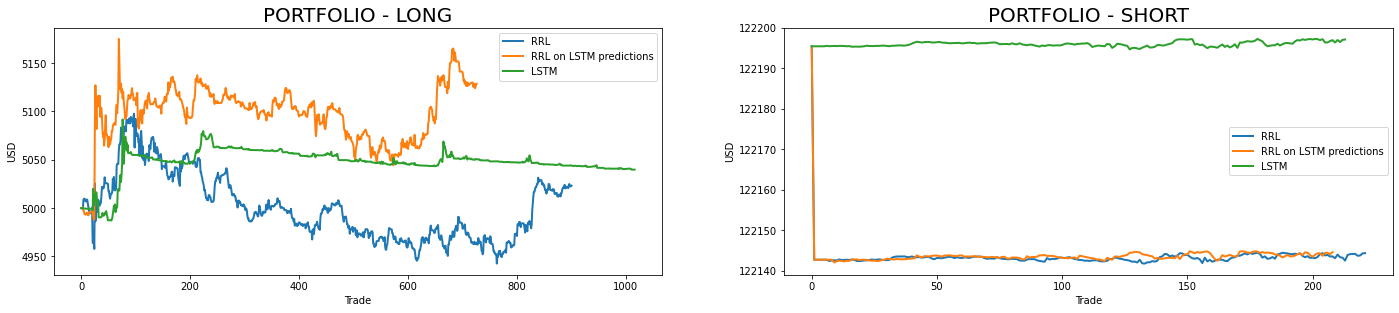

In [42]:
print("---RRL LONG---")
total_rrl_long = trade_long(positions(x_test[:], theta), result['actual_close'].copy())
print("---RRL ON LSTM LONG---")
total_rrl_lstm_long = trade_long(positions(x_lstm_test, theta), result['actual_close'].copy())
print("---LSTM LONG---")
total_lstm_long = trade_long(result['prcnt_change'] * 100, result['actual_close'].copy())
print("---------------------------------------------------")
print("---RRL SHORT---")
total_rrl_short = trade_short(positions(x_test[:], theta), result['actual_close'].copy())
print("---RRL ON LSTM SHORT---")
total_rrl_lstm_short = trade_short(positions(x_lstm_test, theta), result['actual_close'].copy())
print("---LSTM SHORT---")
total_lstm_short = trade_short(result['prcnt_change'], result['actual_close'].copy())

plt.figure(figsize=(24,10))
plt.subplot(2,2,1)
plt.plot(total_rrl_long, label="RRL", linewidth=2)
plt.plot(total_rrl_lstm_long, label="RRL on LSTM predictions", linewidth=2)
plt.plot(total_lstm_long, label="LSTM", linewidth=2)
plt.xlabel('Trade')
plt.ylabel('USD')
plt.legend(loc='best')
plt.title("PORTFOLIO - LONG", fontsize=20)

plt.subplot(2,2,2)
plt.plot(total_rrl_short, label="RRL", linewidth=2)
plt.plot(total_rrl_lstm_short, label="RRL on LSTM predictions", linewidth=2)
plt.plot(total_lstm_short, label="LSTM", linewidth=2)
plt.xlabel('Trade')
plt.ylabel('USD')
plt.legend()
plt.title("PORTFOLIO - SHORT", fontsize=20)